<a href="https://colab.research.google.com/github/Yejide123/Nigeria_2023_Sentiment-Analysis/blob/main/Project_VADERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # mounting the gogle drive for access

Mounted at /content/drive


In [ ]:
# importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # set the style sheet use for plot
import re
import nltk
sns.set()


EVALUATION OF VADER USNG HUMAN **ANNOTATION**

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer # import the nltk (natural language tool kits)
nltk.download('vader_lexicon') # download vader_lexicon module from the ntlk
sia = SentimentIntensityAnalyzer() # initialize and calling the imported sentiment intensity analyzer (sia)
new_texts = ["Happy", "Sad", "Okay"] # create the list of samples words for the evaluation
res_list =[] # create an empty list to store the results
text_polarity_list = [] # create an empty list to add the polarity scores to
for text in new_texts: # looping through the sample list of words
  polarity = sia.polarity_scores(text) # apply the initilized sia to the list of text to generate the polarity
  text_polarity_list.append(polarity) # add the list of the polarity to the created polarity list on every loop

#  apply the rules (0.05 as the threshold) to the compound (intensity) of the polarity result to generate the sentiments

compound_scores = []  # create an empty list to extract all the compounds scores from the polarity lists to

for row in text_polarity_list: # looping through the polarity list

  compound_score = row['compound'] # capture the compond score from every row
  compound_scores.append(compound_score) # append the compound score to the created compound scores list

polarity_list = [] # create an empty polarity list to add the sentiments into.
for score in compound_scores: # looping through the list of compound scores
  if score >= 0.05: # check if the compound score is greater than or equal to 0.05 to get the positive sentiment
    polarity = 'positive'
    polarity_list.append(polarity)
  elif score <= -0.05:  # check if the compound score is less or equal than -0.05 to get the negative sentiment
    polarity = 'negative'
    polarity_list.append(polarity)
  elif score > -0.05 and score < 0.05:  # check if the compound score is between -0.05 and 0.05 get the neutral sentiment
    polarity =  'neutral'
    polarity_list.append(polarity)
VADERS_Sample = pd.DataFrame(np.column_stack(new_texts),
                               columns=polarity_list)   # convert the results to dataframe
VADERS_Sample

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,positive,negative,positive
0,Happy,Sad,Okay


VADERS SENTIMENT ANALYSIS FOR TINUBU

In [ ]:
path =  '/content/drive/MyDrive/Project_codes/Tinubu_cleaned_dataset.csv'
Tinubu_data = pd.read_csv(path) # access the processed Tinubu data


Tinubu_data = Tinubu_data.replace(np.nan, '', regex=True)
Tinubu_text = Tinubu_data['cleaned_text'].tolist() # capture the cleaned_text column and convert to list

In [ ]:
Tinubu_data

,Unnamed: 0,Tweet_Text,cleaned_text
0,0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...
1,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
2,6,"b""RT @DavidHundeyin: On election day, come out...",election day come large group tinubus hooligan...
3,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...
4,8,b'RT @PeterObi: Our most profound and heartfel...,profound heartfelt appreciation go people lago...
...,...,...,...
176623,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
176624,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...
176625,2000232,b'@AdaAnambra2023 The words on the streets now...,word street fuel nd naira note scarcity plot s...
176626,2000235,"b'RT @mrcow_enang: Las las, we will get sense ...",la las get sense force day presidential electi...


In [ ]:
# Run sentiment analysis on Tinubu data usng thesame approach as the evaluated sample text
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Get the polarity list of Tinubu processed data
text_polarity_list = []

for text in Tinubu_text:
  polarity = sia.polarity_scores(text)
  text_polarity_list.append(polarity)
text_polarity_list

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


[{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.6486},
 {'neg': 0.307, 'neu': 0.559, 'pos': 0.134, 'compound': -0.4767},
 {'neg': 0.489, 'neu': 0.511, 'pos': 0.0, 'compound': -0.8225},
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6124},
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.7783},
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019},
 {'neg': 0.224, 'neu': 0.655, 'pos': 0.121, 'compound': -0.3412},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.7579},
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4939},
 {'neg': 0.363, 'neu': 0.341, 'pos': 0.296, 'compound': -0.52},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.38

In [ ]:
# get the list of compound scores from the Tinubu polarity scores
compound_scores = []
for row in text_polarity_list:
  compound_score = row['compound']

  compound_scores.append(compound_score)

# get the list of sentiments from the compound scores by applying rules(0.05 as the threshold)
# first get the sentiments counted
positive = 0
negative = 0
neutral = 0
for score in compound_scores:
  if score >= 0.05:
    positive = positive + 1
  elif score <= -0.05:
    negative = negative + 1
  elif score > -0.05 and score < 0.05:
    neutral = neutral + 1
print("Vaders_Positive_Count : ", positive, "Vaders_Negative_count : ", negative, "Neutral count: ", neutral)

Vaders_Positive_Count :  81920 Vaders_Negative_count :  53683 Neutral count:  41025


In [ ]:
# get the list of sentiments from the compound scores by applying rules(0.05 as the threshold)
compound_scores = []
for row in text_polarity_list:
  compound_score = row['compound']

  compound_scores.append(compound_score)

polarity_list = []

for score in compound_scores:
  if score >= 0.05:
    polarity = 'positive'
    polarity_list.append(polarity)
  elif score <= -0.05:
    polarity = 'negative'
    polarity_list.append(polarity)
  elif score > -0.05 and score < 0.05:
    polarity =  'neutral'
    polarity_list.append(polarity)


polarity_list

['negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'posi

In [ ]:
# append the list of the compound scores and sentiments to the Tinubu data(dataframe)
Tinubu_data['vaders_scores'] = compound_scores
Tinubu_data['label'] = polarity_list

In [ ]:
Tinubu_data['label'].value_counts()

positive    81920
negative    53683
neutral     41025
Name: label, dtype: int64

<Axes: title={'center': 'TINUBU VADERS SENTIMENT ANALYSIS'}>

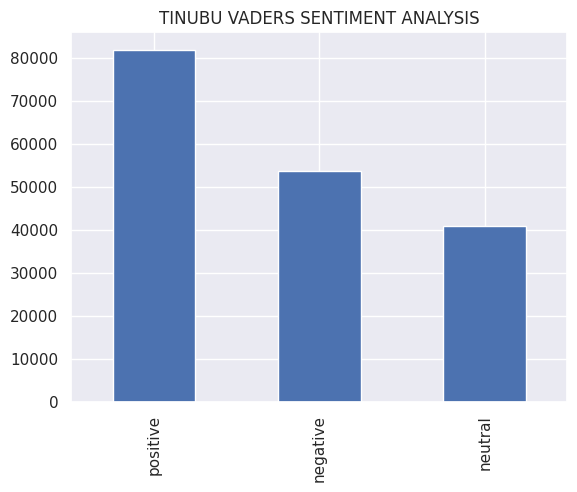

In [ ]:
# plot the bar graph for the each of the sentiments
Tinubu_data['label'].value_counts().plot(kind ='bar', title = 'TINUBU VADERS SENTIMENT ANALYSIS')

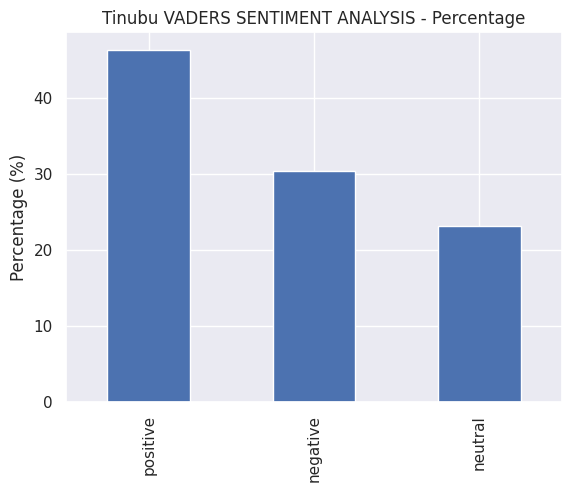

In [ ]:
# Calculate the percentage for each sentiment category
Tinubu_percentage_counts = (Tinubu_data['label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages
Tinubu_percentage_counts.plot(kind='bar', title='Tinubu VADERS SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# the percentage score
Tinubu_percentage_counts

positive    46.38
negative    30.39
neutral     23.23
Name: label, dtype: float64

OBI'S VADERS SENTIMENT ANALYIS

In [ ]:
obi_path =  '/content/drive/MyDrive/Project_codes/Obi_cleaned_dataset.csv'
Obi_data = pd.read_csv(obi_path) # access the processed Obi data


Obi_data = Obi_data.replace(np.nan, '', regex=True)
Obi_text = Obi_data['cleaned_text'].tolist() # capture the cleaned_text column and convert to list

In [ ]:
Obi_data

,Unnamed: 0,Tweet_Text,cleaned_text
0,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
1,3,b'RT @Mario9jaa: FUN FACT: He is now supportin...,fun fact support obi
2,4,b'RT @MimiUhiene: the most dangerous kidnappe...,dangerous kidnapper anambra peter obi governor...
3,5,b'RT @sheni_coker: Peter Obi has done his part...,peter obi do part onus u go massively vote may...
4,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...
...,...,...,...
223657,2000212,b'@dondekojo First choice: Obi Second choice: ...,first choice obi second choice obi third choic...
223658,2000216,b'@victorhabila121 @PodiumReporters @DeeOneAye...,podiumreporters deeoneayekooto peterobi tinubu...
223659,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
223660,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...


In [ ]:
# Run sentiment analysis on Obi data usng thesame approach as the evaluated sample text
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Get the polarity list of Obi processed data
Obi_text_polarity_list = []
for text in Obi_text:
  polarity = sia.polarity_scores(text)
  Obi_text_polarity_list.append(polarity)
Obi_text_polarity_list

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'neg': 0.307, 'neu': 0.559, 'pos': 0.134, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.7184},
 {'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.3252},
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6124},
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.7783},
 {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.0258},
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215},
 {'neg': 0.224, 'neu': 0.655, 'pos': 0.121, 'compound': -0.3412},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.4404},
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182},
 

In [ ]:

# get the list of compound scores from the Obi polarity scores
Obi_compound_scores = []
for row in Obi_text_polarity_list:
  compound_score = row['compound']

  Obi_compound_scores.append(compound_score)

# get the list of sentiments from the compound scores by applying rules(0.05 as the threshold)
# first get the sentiments counted
positive = 0
negative = 0
neutral = 0
for score in Obi_compound_scores:
  if score >= 0.05:
    positive = positive + 1
  elif score <= -0.05:
    negative = negative + 1
  elif score > -0.05 and score < 0.05:
    neutral = neutral + 1
print("Vaders_Positive_Count : ", positive, "Vaders_Negative_count : ", negative, "Neutral count: ", neutral)

Vaders_Positive_Count :  104240 Vaders_Negative_count :  63754 Neutral count:  55668


In [ ]:
Obi_compound_scores = []
for row in Obi_text_polarity_list:
  compound_score = row['compound']

  Obi_compound_scores.append(compound_score)

Obi_polarity_list = []
# get the list of sentiments from the compound scores by applying rules(0.05 as the threshold)

for score in Obi_compound_scores:
  if score >= 0.05:
    polarity = 'positive'
    Obi_polarity_list.append(polarity)
  elif score <= -0.05:
    polarity = 'negative'
    Obi_polarity_list.append(polarity)
  elif score > -0.05 and score < 0.05:
    polarity =  'neutral'
    Obi_polarity_list.append(polarity)


Obi_polarity_list

['negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neu

In [ ]:
# append the list of the compound scores and sentiments to the Obi data(dataframe)
Obi_data['vaders_scores'] = Obi_compound_scores
Obi_data['label'] = Obi_polarity_list

In [ ]:
Obi_data['label'].value_counts()

positive    104240
negative     63754
neutral      55668
Name: label, dtype: int64

<Axes: title={'center': 'Obi VADERS SENTIMENT ANALYSIS'}>

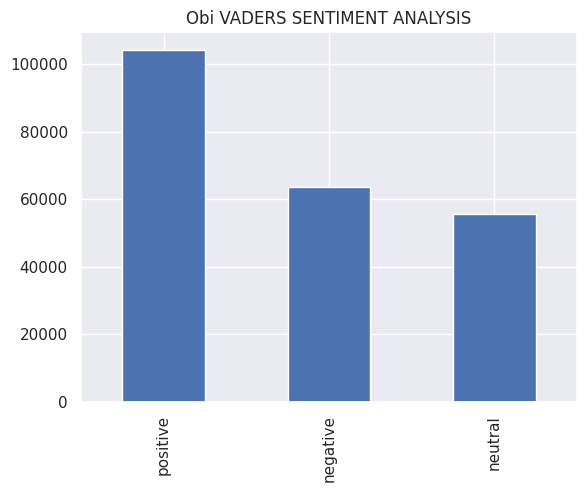

In [ ]:
# plot the bar graph for the each of the VADER sentiments
Obi_data['label'].value_counts().plot(kind ='bar', title = 'Obi VADERS SENTIMENT ANALYSIS')

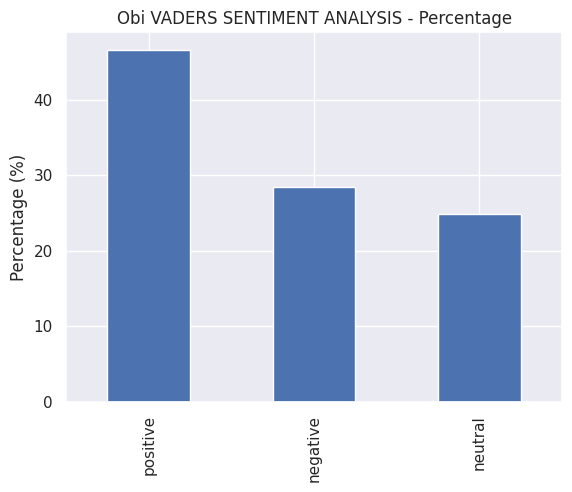

In [ ]:
# Calculate the percentage for each sentiment category
Obi_percentage_counts = (Obi_data['label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages
Obi_percentage_counts.plot(kind='bar', title='Obi VADERS SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# the percentage score
Obi_percentage_counts

positive    46.61
negative    28.50
neutral     24.89
Name: label, dtype: float64

ATIKU's VADERS SENTIMENT ANALYSIS

In [ ]:
Atiku_path =  '/content/drive/MyDrive/Project_codes/Atiku_cleaned_dataset.csv'
Atiku_data = pd.read_csv(Atiku_path) # access the processed Atiku data


Atiku_data = Atiku_data.replace(np.nan, '', regex=True)
Atiku_text = Atiku_data['cleaned_text'].tolist() # capture the cleaned_text column and convert to list

In [ ]:
# Run sentiment analysis on Atiku data usng thesame approach as the evaluated sample text
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Get the polarity list of Atiku processed data

Atiku_text_polarity_list = []

for text in Atiku_text:
  polarity = sia.polarity_scores(text)
  Atiku_text_polarity_list.append(polarity)
Atiku_text_polarity_list

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.6486},
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.6244},
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369},
 {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.4717},
 {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.5106},
 {'neg': 0.152, 'neu': 0.652, 'pos': 0.196, 'compound': 0.2023},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.6428},
 {'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'compound': -0.5859},
 {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.3612},
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019},
 {'neg': 0.281, 'neu': 0.564, 'pos': 0.155, 'compound': -0.2509},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.6486},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0

In [ ]:
# get the list of compound scores from the Atiku polarity scores
Atiku_compound_scores = []
for row in Atiku_text_polarity_list:
  compound_score = row['compound']

  Atiku_compound_scores.append(compound_score)
  # get the list of sentiments from the compound scores by applying rules(0.05 as the threshold)
# first get the sentiments counted

positive = 0
negative = 0
neutral = 0
for score in Atiku_compound_scores:
  if score >= 0.05:
    positive = positive + 1
  elif score <= -0.05:
    negative = negative + 1
  elif score > -0.05 and score < 0.05:
    neutral = neutral + 1
print("Vaders_Positive_Count : ", positive, "Vaders_Negative_count : ", negative, "Neutral count: ", neutral)

Vaders_Positive_Count :  15861 Vaders_Negative_count :  9600 Neutral count:  6393


In [ ]:
# get the list of compound scores from the Atiku polarity scores
Atiku_compound_scores = []
for row in Atiku_text_polarity_list:
  compound_score = row['compound']

  Atiku_compound_scores.append(compound_score)

# get the list of sentiments from the compound scores by applying rules(0.05 as the threshold)
Atiku_polarity_list = []

for score in Atiku_compound_scores:
  if score >= 0.05:
    polarity = 'positive'
    Atiku_polarity_list.append(polarity)
  elif score <= -0.05:
    polarity = 'negative'
    Atiku_polarity_list.append(polarity)
  elif score > -0.05 and score < 0.05:
    polarity =  'neutral'
    Atiku_polarity_list.append(polarity)


Atiku_polarity_list

['negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'ne

In [ ]:
# append the list of the compound scores and sentiments to the Atiku data(dataframe)
Atiku_data['vaders_scores'] = Atiku_compound_scores
Atiku_data['label'] = Atiku_polarity_list

In [ ]:
Atiku_data['label'].value_counts()

positive    15861
negative     9600
neutral      6393
Name: label, dtype: int64

<Axes: title={'center': 'Atiku VADERS SENTIMENT ANALYSIS'}>

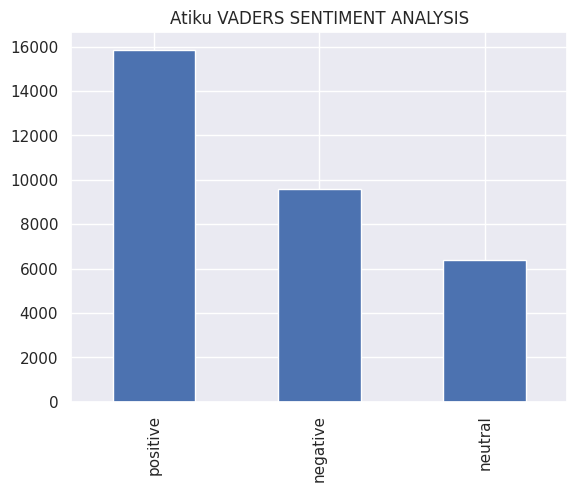

In [ ]:
# plot the bar graph for the each of the sentiments
Atiku_data['label'].value_counts().plot(kind ='bar', title = 'Atiku VADERS SENTIMENT ANALYSIS')

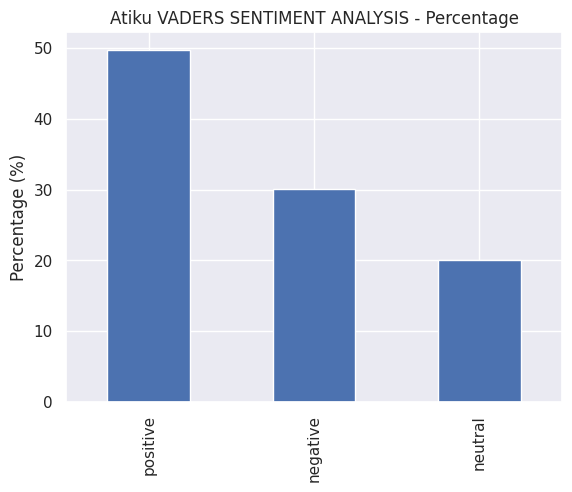

In [ ]:
# Calculate the percentage for each sentiment category
Atiku_percentage_counts = (Atiku_data['label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages
Atiku_percentage_counts.plot(kind='bar', title='Atiku VADERS SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# the percentage score
Atiku_percentage_counts

positive    49.79
negative    30.14
neutral     20.07
Name: label, dtype: float64

# **Comparative Analysis of the three presidential candidates (Tinubu, Obi and Atiku)
**

In [ ]:
#  get Atiku sentiments
Atiku_predicted_count = Atiku_data['label'].value_counts()
Atiku_data['label'].value_counts()

positive    15861
negative     9600
neutral      6393
Name: label, dtype: int64

In [ ]:
#  get Tinubu sentiments
Tinubu_predicted_count = Tinubu_data['label'].value_counts()
Tinubu_data['label'].value_counts()

positive    81920
negative    53683
neutral     41025
Name: label, dtype: int64

In [ ]:
#  get Obi sentiments
Obi_predicted_count = Obi_data['label'].value_counts()
Obi_data['label'].value_counts()

positive    104240
negative     63754
neutral      55668
Name: label, dtype: int64

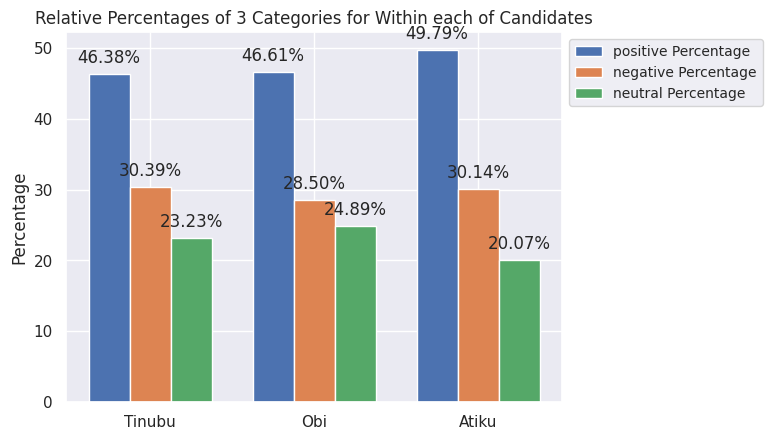

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Tinubu', 'Obi', 'Atiku'] #  create  an empty list to store the names of the presidential's candidates
categories = ['positive', 'negative', 'neutral'] #  create  the unique list of the sentiment\s categories

# Percentages for each category within each of the candidates
data = np.array([
    [Tinubu_predicted_count['positive'], Tinubu_predicted_count['negative'], Tinubu_predicted_count['neutral']],  # Tinubu
    [Obi_predicted_count['positive'], Obi_predicted_count['negative'], Obi_predicted_count['neutral']],  # Obi
    [Atiku_predicted_count['positive'], Atiku_predicted_count['negative'], Atiku_predicted_count['neutral']],  # Atiku
])

# Calculate overall percentages for each of the candidates
overall_percentages = np.sum(data, axis=1)

# Normalize data to get relative percentages
normalized_data = (data.T / overall_percentages).T * 100

# Plotting the graph
fig, ax = plt.subplots()
# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, normalized_data[:, i], width=bar_width, label=f'{category} Percentage')

# Adding labels(names of the candidates)
ax.set_ylabel('Percentage')
ax.set_title('Relative Percentages of 3 Categories for Within each of Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = normalized_data[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


Plotting the candidates sentiment graph based on individual analysis

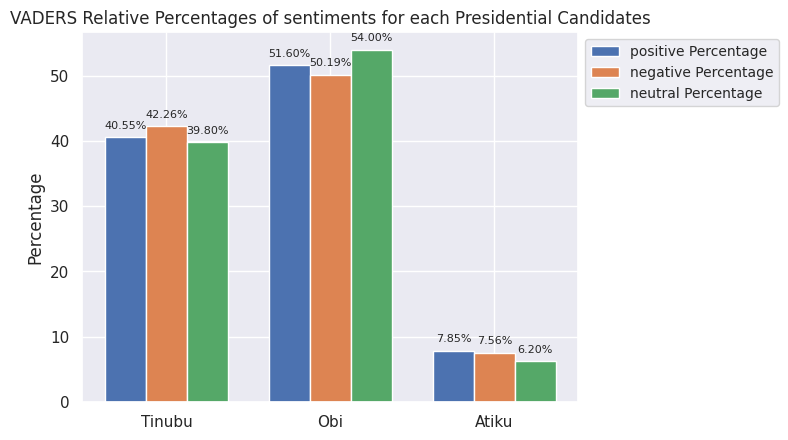

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# getting the graph showing each of the
labels = ['Tinubu', 'Obi', 'Atiku']
categories = ['positive', 'negative', 'neutral']

# Counts for each category within each of the names
data = np.array([
    [Tinubu_predicted_count['positive'], Tinubu_predicted_count['negative'], Tinubu_predicted_count['neutral']],  # Tinubu
    [Obi_predicted_count['positive'], Obi_predicted_count['negative'], Obi_predicted_count['neutral']],  # Obi
    [Atiku_predicted_count['positive'], Atiku_predicted_count['negative'], Atiku_predicted_count['neutral']],  # Atiku
])

# Calculate overall counts for each category
overall_category_counts = np.sum(data, axis=0)

# Calculate relative percentages
relative_percentages = (data / overall_category_counts) * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, relative_percentages[:, i], width=bar_width, label=f'{category} Percentage')

# Modifying the bar abd legends labels
ax.set_ylabel('Percentage')
ax.set_title('VADERS Relative Percentages of sentiments for each Presidential Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars with reduced font size
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = relative_percentages[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()
